In [1]:
import numpy as np
import matplotlib.pyplot as plt

The experiment is described by a simple binomial distribution. Our only parameter is head probability $p_0$, and the
distribution is
$$ \mathbb{P}(75H,\ 25T) = \frac{C_{100}^{25}}{2^{100}} \cdot p_0^{75} \left( 1 - p_0 \right)^{25}. $$
The combinations number is irrelevant to our calculations and can be omitted. The expression above can be treated both as the
conditional probability of an outcome given the $p_0$:
$$ \mathbb{P}\left( 75H,\ 25T\ |\ p_0 \right) = \alpha p_0^{75} \left( 1 - p_0 \right)^{25} $$
and as the conditional probability of having a certain $p_0$ given the outcome
$$ \mathbb{P}\left( p_0\ |\ 75H,\ 25T \right) = \alpha p_0^{75} \left( 1 - p_0 \right)^{25} $$
i.e. as a function of $p_0$, which is what a likelihood function exactly is.

In [2]:
def likelihood(p: np.ndarray) -> np.ndarray:
    return np.power(p, 75) * np.power(1.0 - p, 25)

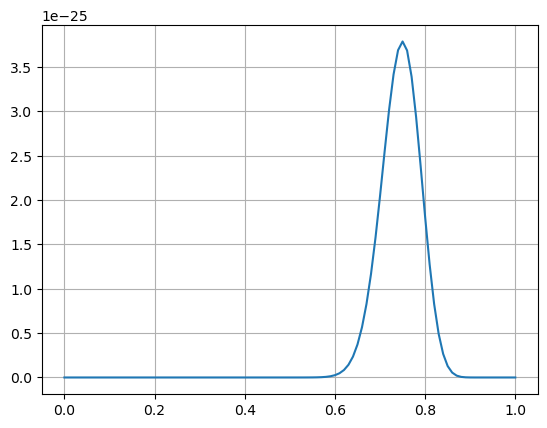

In [3]:
proba = np.linspace(0.0, 1.0, 101)
plt.plot(proba, likelihood(proba))
plt.grid(True)
plt.show()

The maxima can be derived analytically:

$$ \frac{\partial L(p)}{\partial p} = 
    \alpha\left( 75p^{74}\left( 1 - p \right)^{25} - 25p^{75}\left( 1 - p \right)^{24} \right) =
    25\alpha p \left(3 - 4p \right)\ \Rightarrow\ p_0 = \frac 34. $$

A symmetric 95% confidence interval would be such $\delta$ that
$$ \int\limits_{p_0 - \delta}^{p_0 + \delta} L(p)dp = 0.95. $$

$$ \int L(p)dp = \alpha\int \left( p^{75} - p^{100} \right) dp =
    \frac{\alpha p^{76}}{25} \left( \frac{1}{3} - \frac{p^{25}}{4} \right) + C $$

$$ 1 = \int\limits_0^1 L(p)dp = \frac{\alpha}{25} \left( \frac 13 - \frac 14 \right) = \frac{\alpha}{300}\ \Rightarrow\ \alpha = 300. $$

In [10]:
p_0 = 0.75

def antiderivative(p: np.ndarray) -> np.ndarray:
    return 12.0 * np.power(p, 76) * (1.0 / 3.0 - 0.25 * np.power(p, 25))

def confidence_level(delta: float) -> float:
    return antiderivative(p_0 + delta) - antiderivative(p_0 - delta)

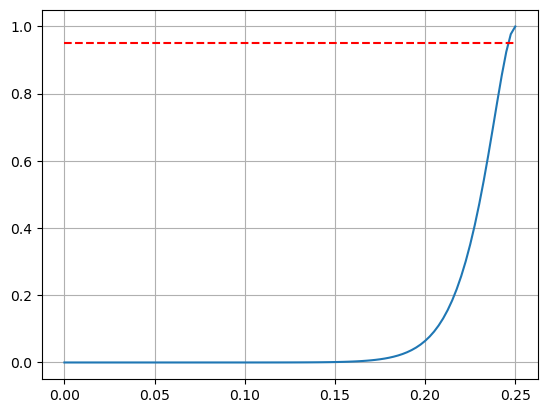

In [22]:
x = np.linspace(0.0, 0.25, 101)
plt.plot(x, confidence_level(x))
plt.hlines(0.95, 0.0, 0.25, colors='red', linestyles='--')
plt.grid(True)
plt.show()

In [23]:
from scipy.optimize import fsolve
result = fsolve(func=lambda x: confidence_level(x) - 0.95,
                x0=np.array([0.24]))
print(result)

[0.24607571]


So, the final estimate is $p_0 = 0.75 \pm 0.25$ CL $95\%$.